# Seasonal Analisis of discharges in the Mälaren catchement. 
## R code
This code complemente the main python code
To create the file 'NormQ_2000-2020.csv' run cells 1 to 5 in the main code.



In [23]:
# Cell 1R
SYear<-2019
EYear<-2020 

df1 <- read.csv('NormQ_2000-2020.csv')
df2 <- read.csv('NormQarea_2000-2020.csv')
df1 <- df1[,-1]
df1 <- data.matrix(df1, rownames.force = NA)
df1 <- t(df1)

# fix the random generator seed for reprudicibility
set.seed(2021)

In [26]:
install.packages('')

also installing the dependencies ‘rlecuyer’, ‘float’, ‘pbdMPI’

Warning message in install.packages("pmclust"):
“installation of package ‘pbdMPI’ had non-zero exit status”Warning message in install.packages("pmclust"):
“installation of package ‘pmclust’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


The dataset is defined with one dimension as the number of days and as a second dimension the number of subcatchements. Given the fine division of such subcatchements is expected an high degree of cross correlation between different subcarchement. With this in mind the data set is clustered to reduce the subcatchements dimension. 
Such cluster represents groups of catchement that have discharges well correlated between eachothers. 
A kmeans method is used given its good versatility, for further improvement different clustering methods need to tested that may overcome kmeans limitation such as predefined number of clusters. 

In [33]:
#Cell 2R
CL <- kmeans(df1,10,iter.max = 400)
Class <-CL[["cluster"]]
class(Class)

[1] "integer"

In [34]:
#Cell 3R
write.csv(Class,'GeoClass.csv')


## End of first part of R code 
run cell 7 to 8 before proceed to perform the SOM analisis 



# SOM 
The SOM method is used to identify different discharge regimes. This is given following the idea that each day is described by the average discharge of each cluster of subcatchement identified in the previous part of the code. As a such the SOM algoritm help in orginize the dayis acordingly on how similar the discarge pattern are in the whole Mälaren catchement for each day.
Such similar discharge patterns can be read as different discharge regimes, while is expected to observe some seasonal regimes more stable in time is also expected to obtain some that are more puntual and can be indication of different kind of storm events.
Then the distances in the new created space are used to cluluster in time our dataset.
The code used is based on the example presented at https://www.polarmicrobes.org/tutorial-self-organizing-maps-in-r/

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-7


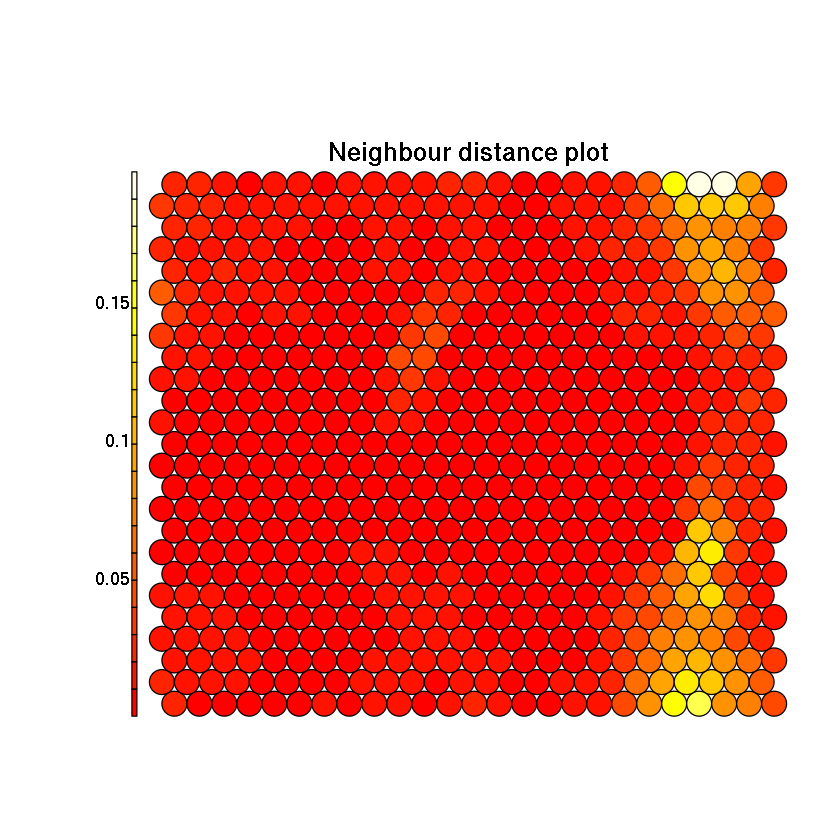

In [1]:
#Cell 4R
#load library
library (kohonen)
library (vegan)

df1GeoClass <- read.csv('df1GeoClass.csv')

df1GeoClass <- df1GeoClass[,-1]

df1GeoClass<-t(df1GeoClass)


#Create the SOM grid 
grid.size <- 25
som.grid <- somgrid(xdim = grid.size,
                    ydim = grid.size,
                    topo = 'hexagonal',
                    toroidal = T
                    )

# Som setting 
som.model <- som(df1GeoClass,
                   grid = som.grid)
#plot counts
#plot(Q_SOM_model, type = "counts")
#plot(Q_SOM_model, type = "mapping")
plot(som.model, type = "dist.neighbours")

som.events <- som.model$codes[[1]]
som.dist <- as.matrix(dist(som.events))


once the SOM mode il trained with the dataset, and a distance map is obtained, is then possible to use it to identify the discharge regimes clusters again a kmeans clustering method is used.

 Named int [1:625] 4 4 4 4 4 8 8 8 8 6 ...
 - attr(*, "names")= chr [1:625] "V1" "V2" "V3" "V4" ...


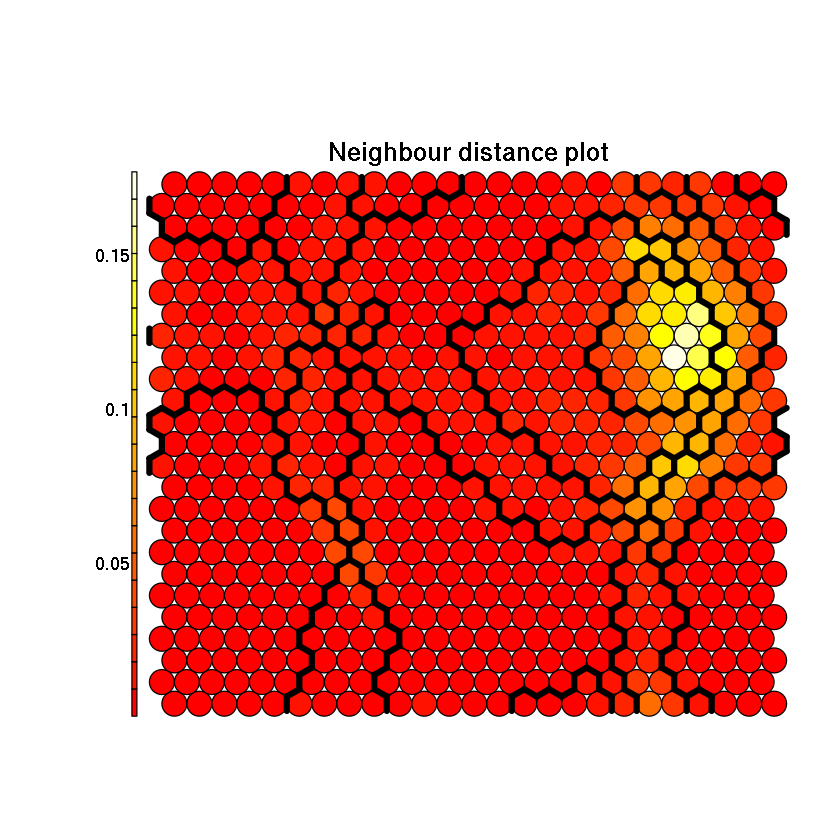

In [44]:
#Cell 6R


plotSOM <- function(clusters){
  plot(som.model,
       type = 'dist.neighbours',
       bg = som.events,
       keepMargins = F,
       col = NA)
  
  add.cluster.boundaries(som.model, clusters)
}


  
  ## k-means clustering
  
  som.cluster <- kmeans(som.events, centers = 8, iter.max = 100, nstart = 10)$cluster # k-means
  
   
  
plotSOM(som.cluster)

Cluster<-som.cluster
str(Cluster)

In [45]:
# Cell 7R
write.csv(Cluster,'Cluster.csv')

The following cell combine, on one side, the information about which day is assigned to a specific node and on the other side at which cluster is assigned each node to match clusters to days. 

In [46]:
# Cell 8R
DataNodes<-som.model$unit.classif
str(DataNodes)
count=1
DataCluster<-vector()
for(i in DataNodes){
    count=count+1
var1=DataNodes[i]
    #print(Cluster[[var1]])
    #print(i)
DataCluster[count]=Cluster[[var1]]
}
DataCluster<-DataCluster[-1]
#print(DataCluster)
str(DataCluster)

 num [1:7671] 242 242 243 243 267 267 292 346 343 343 ...
 int [1:7671] 4 4 4 4 4 4 4 5 5 5 ...


In [40]:
# Cell 9R
write.csv(DataCluster,'DataCluster.csv')

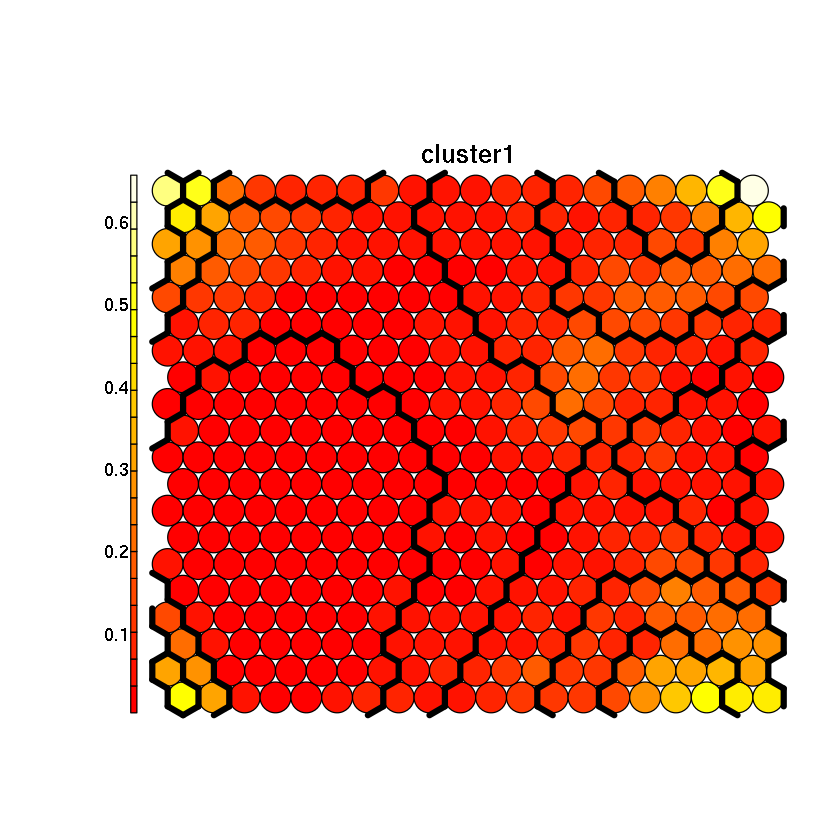

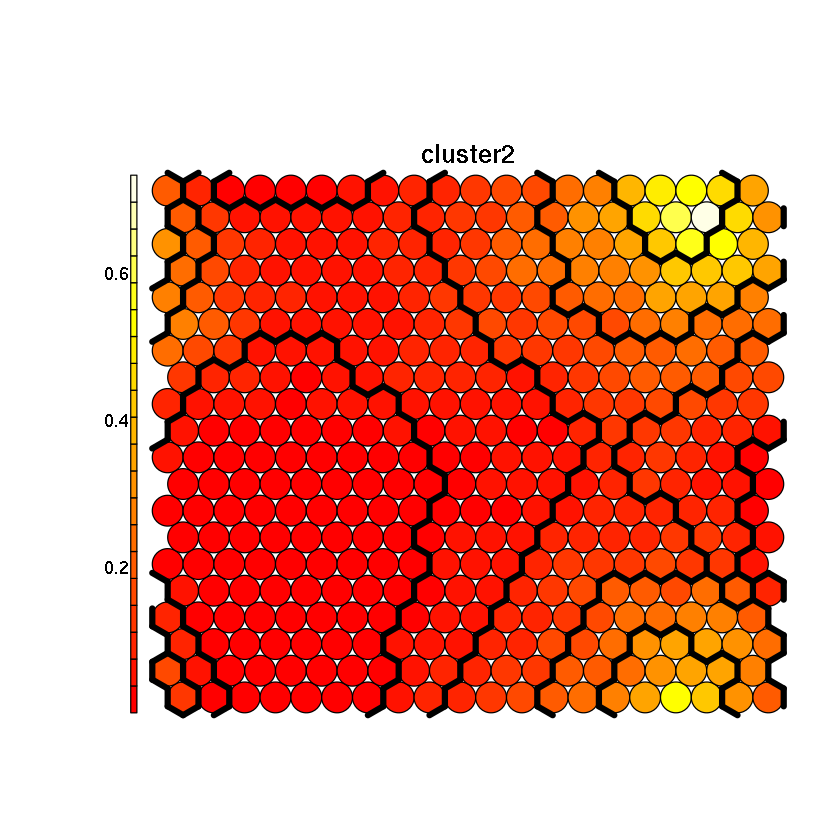

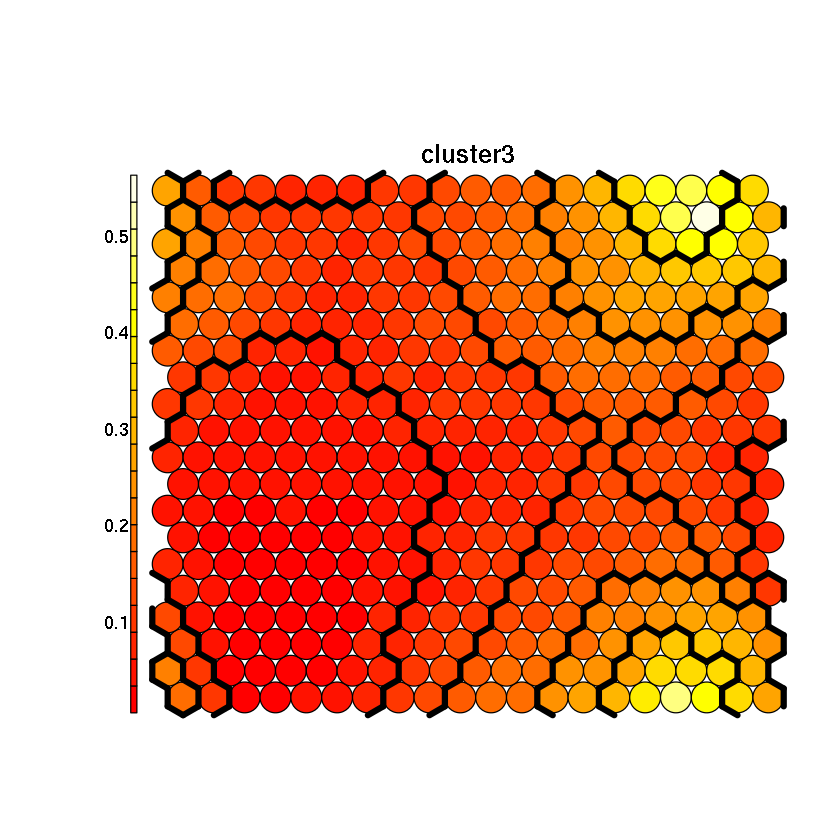

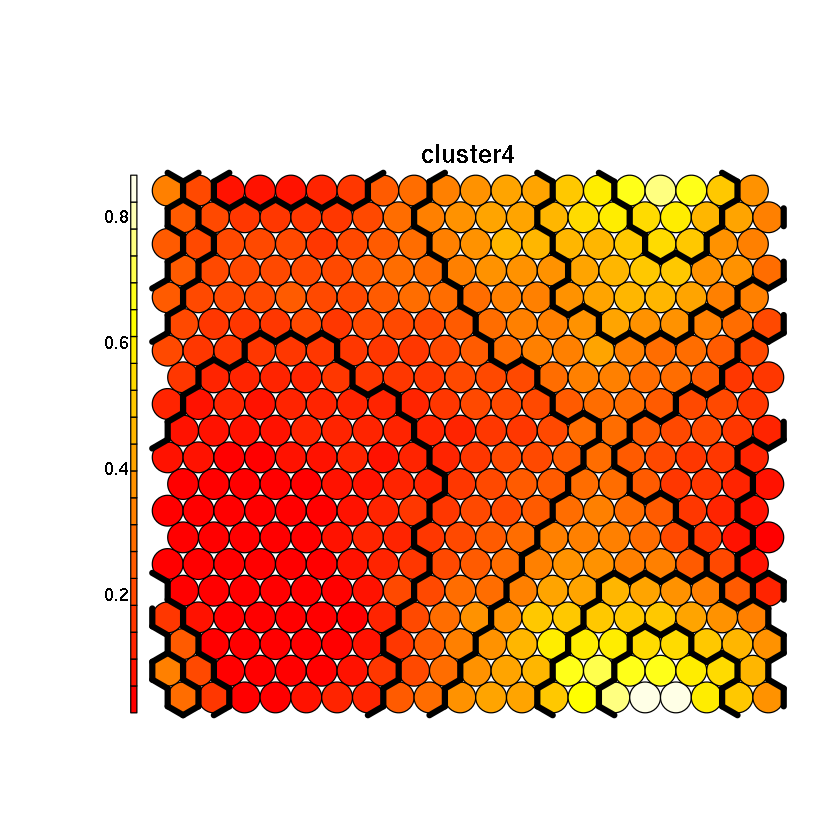

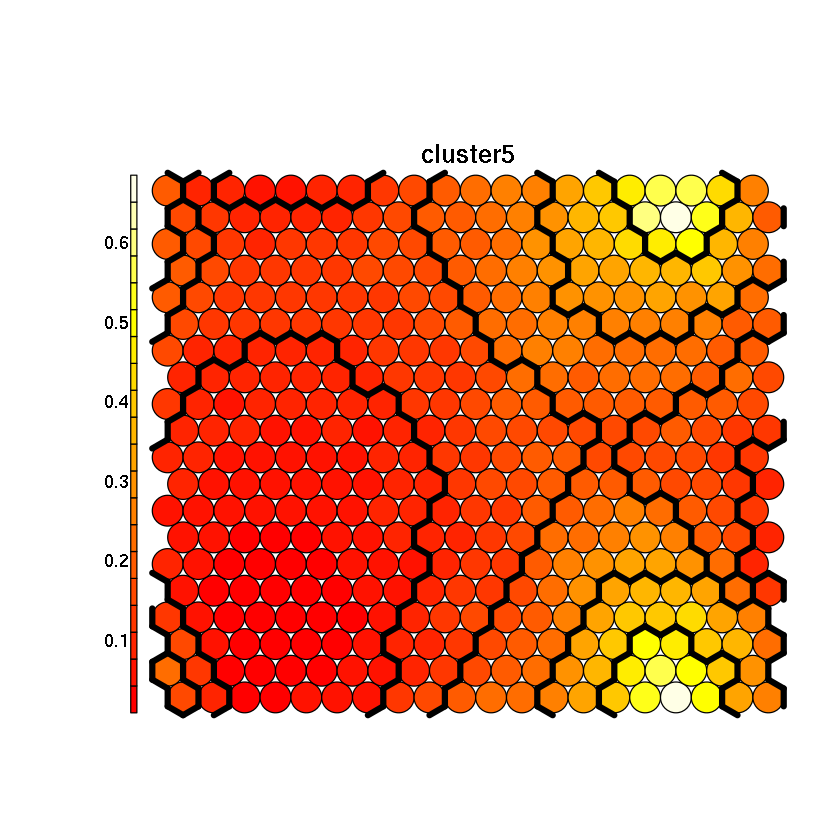

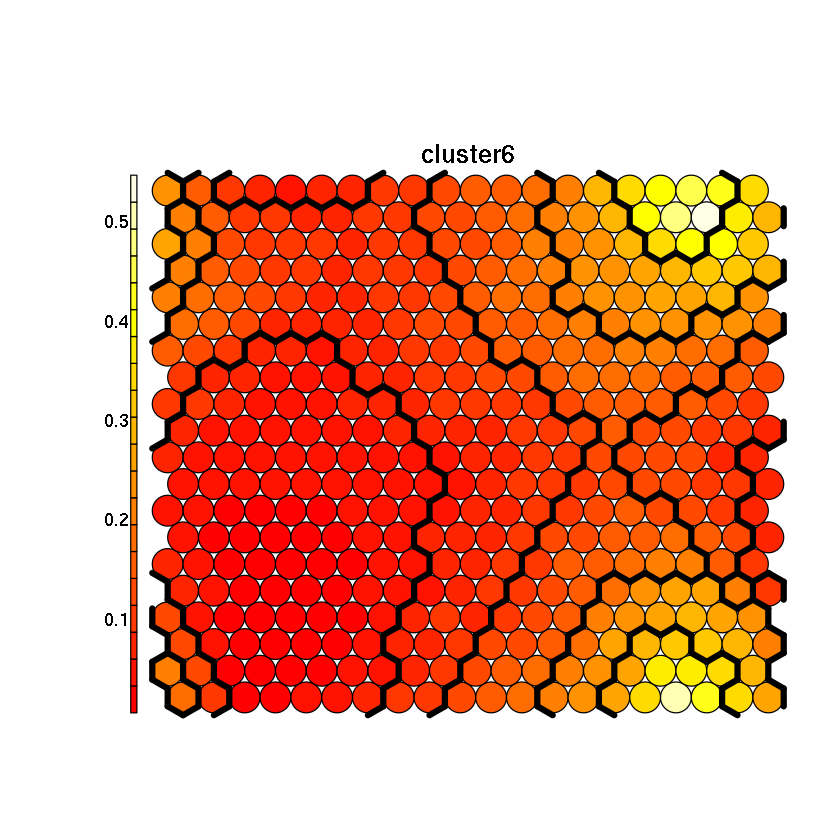

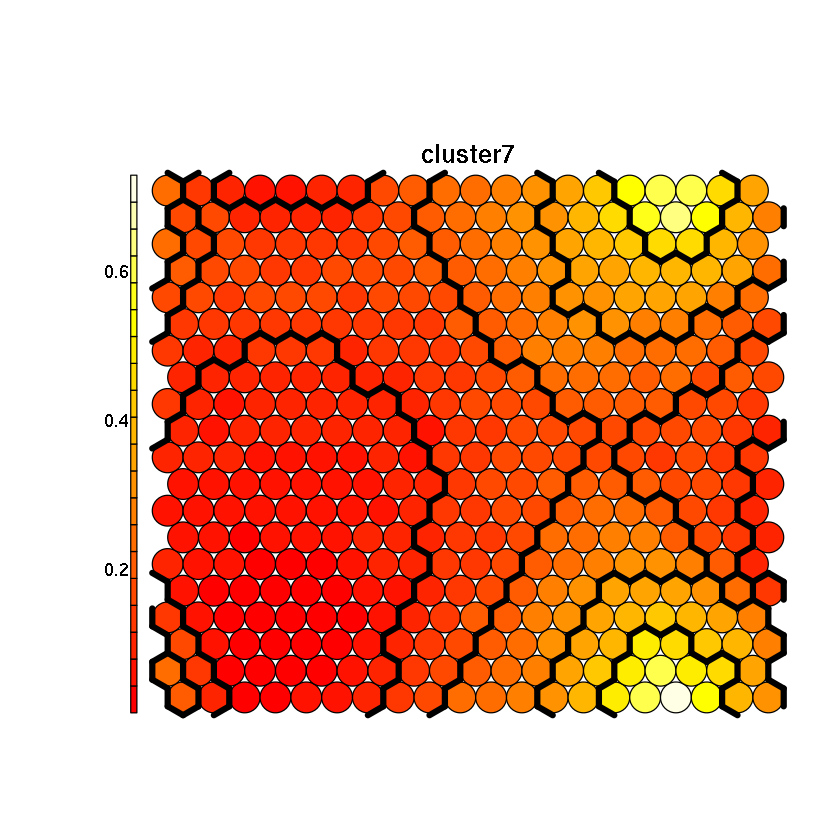

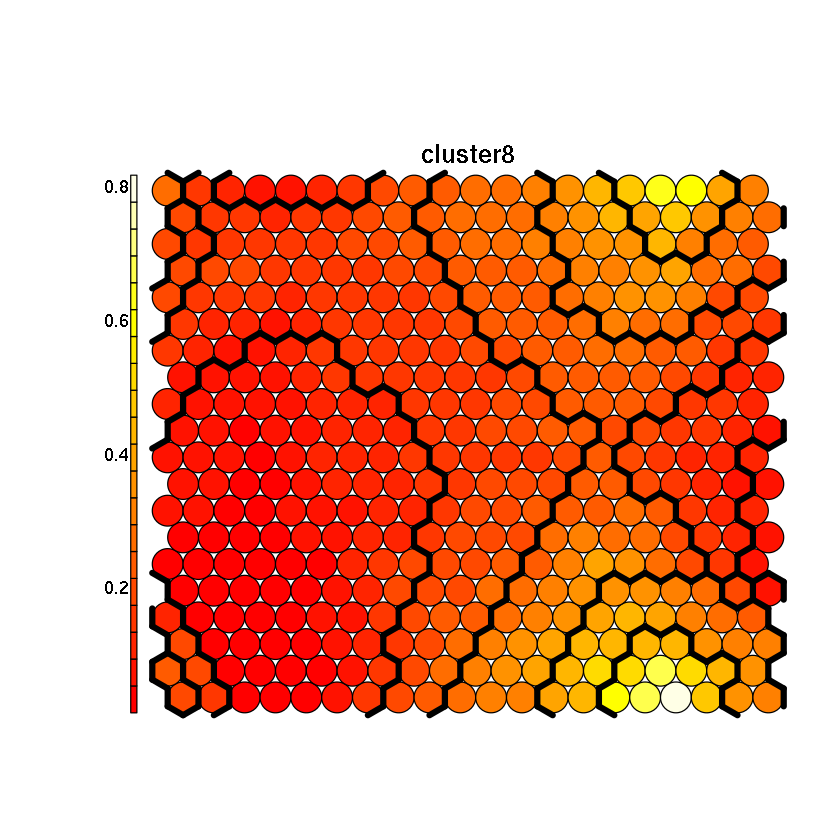

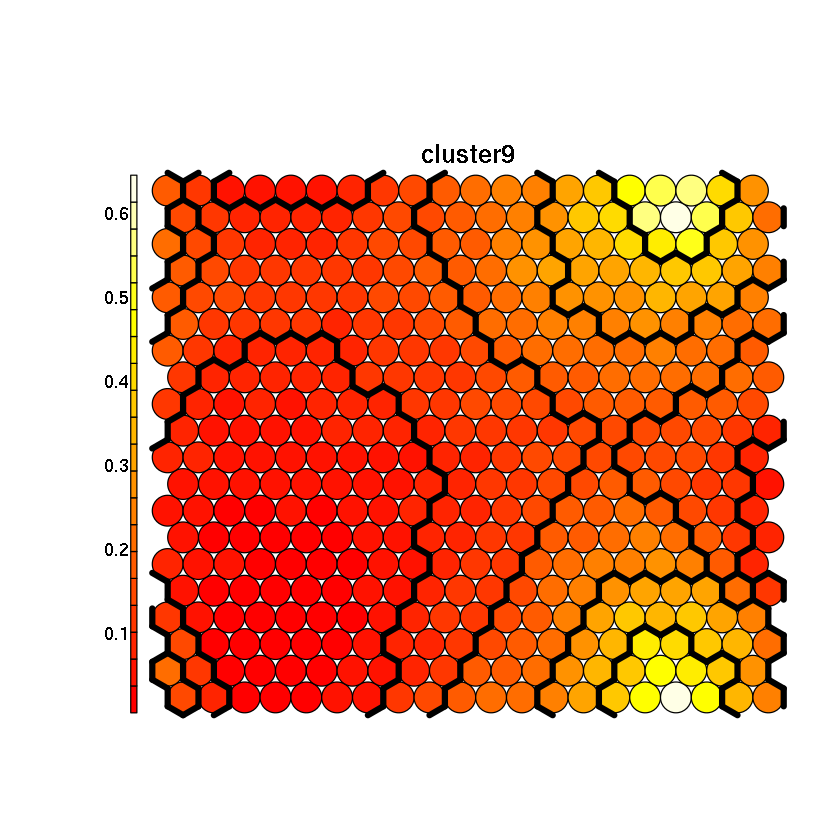

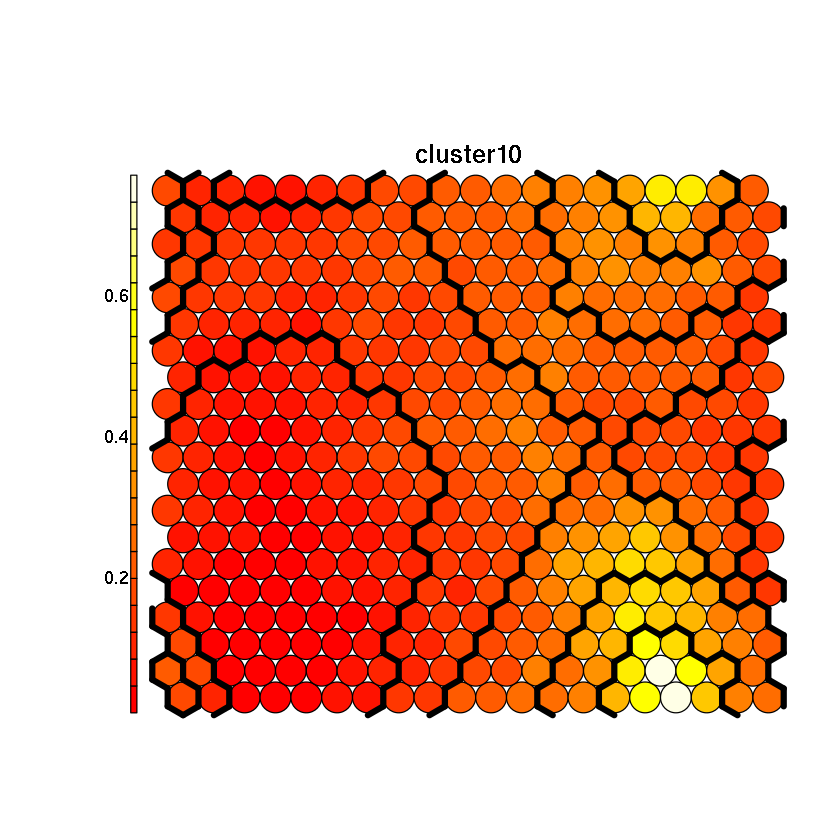

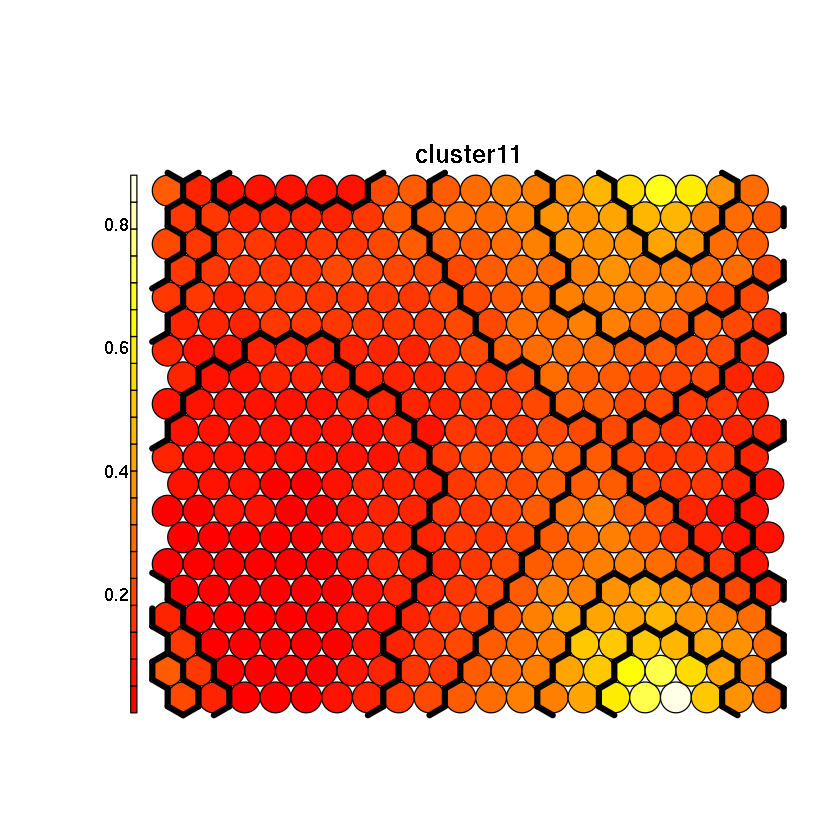

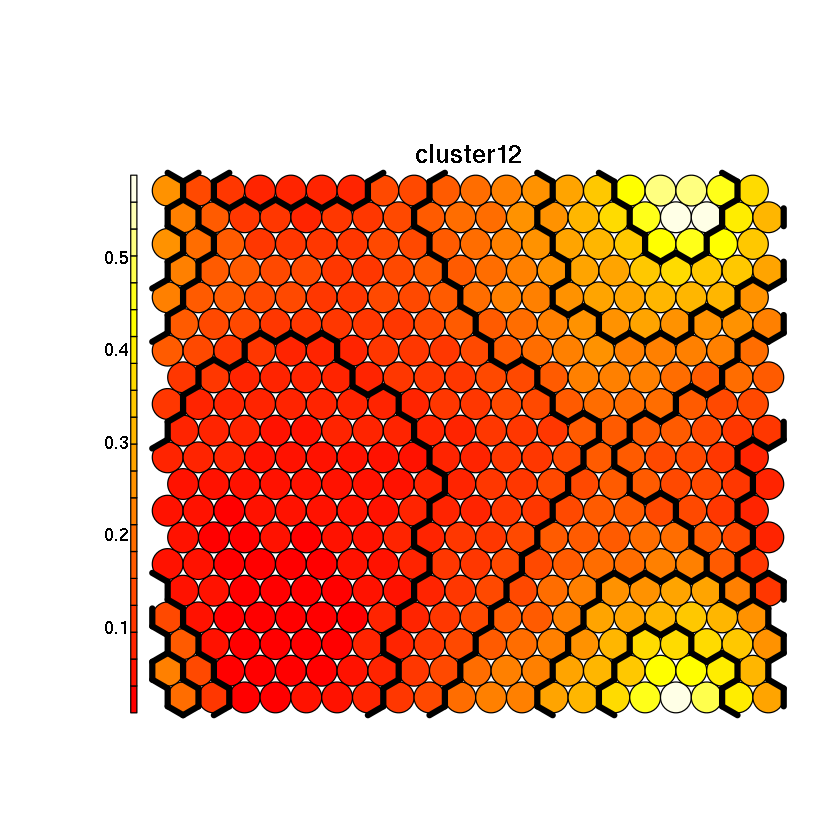

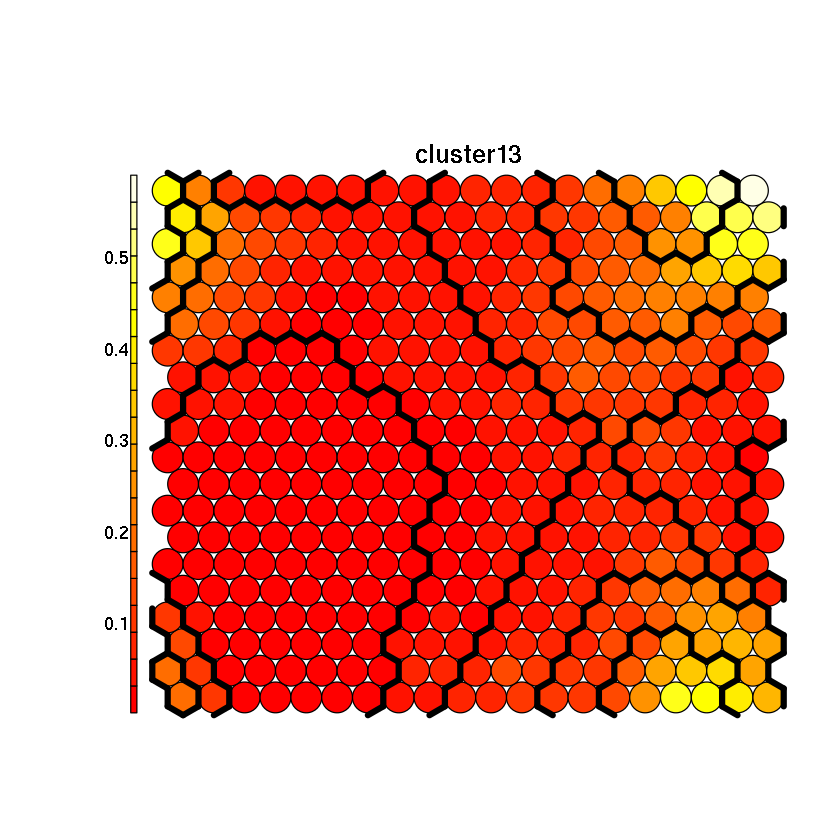

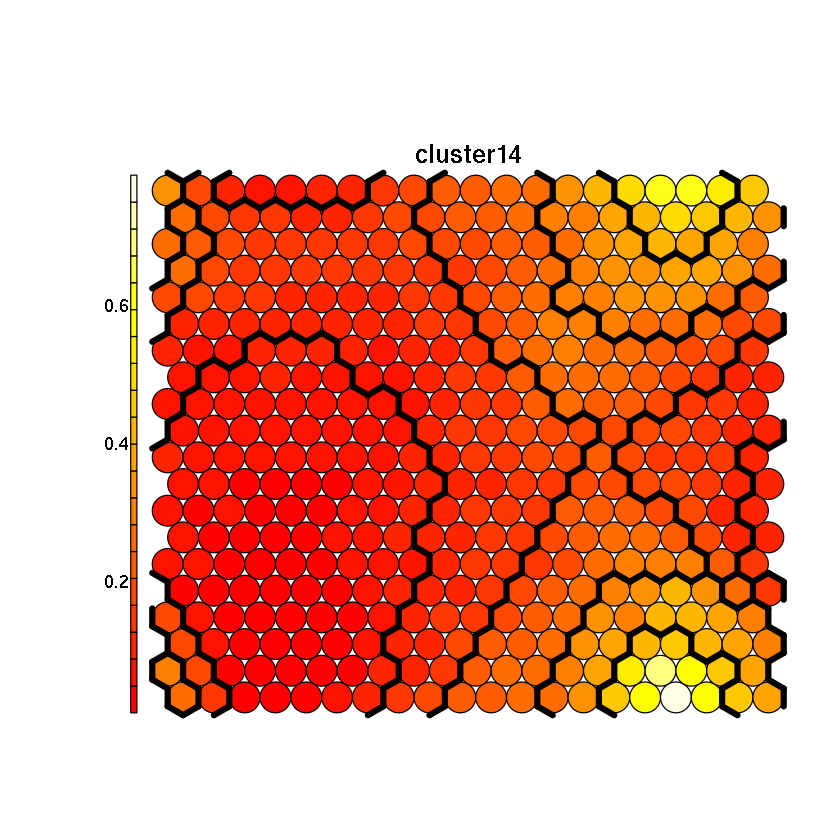

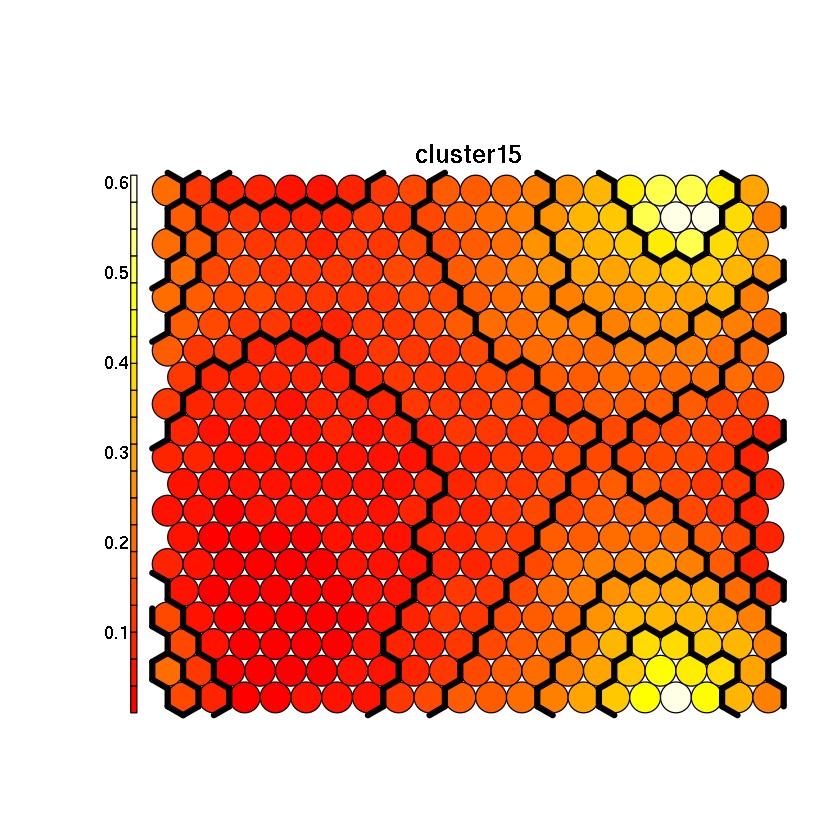

In [42]:
# Cell 10R
plot(som.model, type = "property",
     property = getCodes(som.model)[,1],
     main = "cluster1")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,2],
     main = "cluster2")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,3],
     main = "cluster3")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,4],
     main = "cluster4")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,5],
     main = "cluster5")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,6],
     main = "cluster6")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,7],
     main = "cluster7")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,8],
     main = "cluster8")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,9],
     main = "cluster9")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,10],
     main = "cluster10")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,11],
     main = "cluster11")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,12],
     main = "cluster12")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,13],
     main = "cluster13")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,14],
     main = "cluster14")

add.cluster.boundaries(som.model, som.cluster)

plot(som.model, type = "property",
     property = getCodes(som.model)[,15],
     main = "cluster15")

add.cluster.boundaries(som.model, som.cluster)
